In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-term-deposit-dataset/new_train2.csv
/kaggle/input/bank-term-deposit-dataset/submission.csv
/kaggle/input/bank-term-deposit-dataset/new_test.csv
/kaggle/input/bank-term-deposit-dataset/preprocessed_data.csv


# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using AUC - Probability to discriminate between subscriber and non-subscriber. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE


### Load and Prepare dataset

- In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.

In [5]:
# accessing to the folder where the file is stored
path = '../input/bank-term-deposit-dataset/new_train2.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (32954, 14)


age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   55       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   55       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign     poutcome    y  
0   cellular   nov         wed       227         4  nonexistent   no  
1  telephone   nov         wed       202         2      failure   no  
2   cellular   jul         mon       550         1  nonexistent  yes  
3  telephone   may         mon       120         2  nonexistent   no  
4   cellular   jun         tue       368         2  nonexistent   no

# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets:
`train.csv` with all examples (32950) and 14 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

`test.csv` which is the test data that consists  of 8238 observations and 13 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Check Numeric and Categorical Features

If you are familiar with machine learning, you will know that a dataset consists of numerical and categorical columns.

Looking at the dataset, we think we can identify the categorical and continuous columns in it. Right? But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.


### Numeric Data 
Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Ex: Person's height, weight, IQ etc. 

In [6]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns      # we will store the numeric features in a variable
print("===="*20)
print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign
0   49       227         4
1   37       202         2
2   55       550         1
3   36       120         2
4   55       368         2


### Categorical Data
Categorical data is a type of data that can be stored into groups or categories with the aid of names or labels. 

For example, gender is a categorical data because it can be categorized into male and female according to some unique qualities possessed by each gender. 

In [7]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns      # we will store the categorical features in a variable

print("===="*20)
print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [8]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object


In [9]:
# CHECK THE NON-NULL COUNT OF ALL COLUMNS:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32954 entries, 0 to 32953
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32954 non-null  int64 
 1   job          32954 non-null  object
 2   marital      32954 non-null  object
 3   education    32954 non-null  object
 4   default      32954 non-null  object
 5   housing      32954 non-null  object
 6   loan         32954 non-null  object
 7   contact      32954 non-null  object
 8   month        32954 non-null  object
 9   day_of_week  32954 non-null  object
 10  duration     32954 non-null  int64 
 11  campaign     32954 non-null  int64 
 12  poutcome     32954 non-null  object
 13  y            32954 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.5+ MB
None


### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

The code below that takes the target variable and outputs the distribution of classes in the target.

In [10]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     88.732779
yes    11.267221
Name: y, dtype: float64


### Observations : 
- The class distribution in the target is ~89:11. This is a clear indication of imbalance.
- By now you should be well familiar with the methods on how to deal with the imbalance in data.

###  Univariate analysis of Categorical columns

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

- The code plots the frequency of all the values in the categorical variables. 


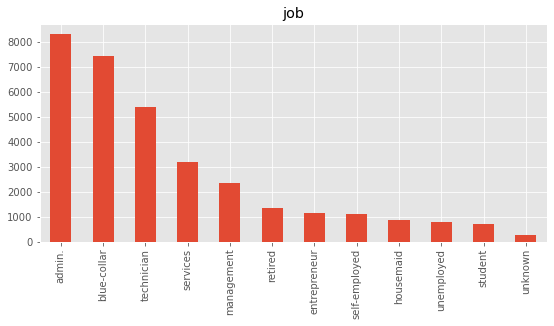

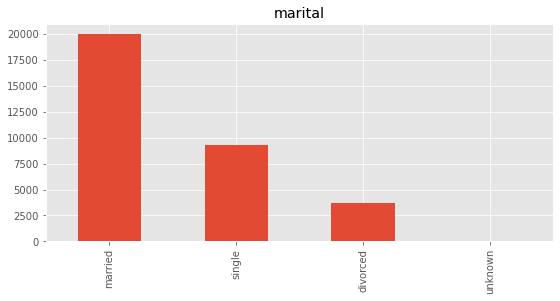

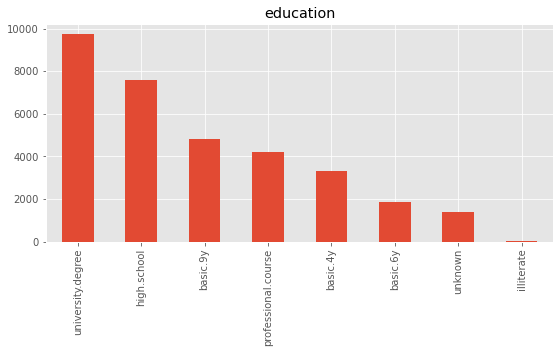

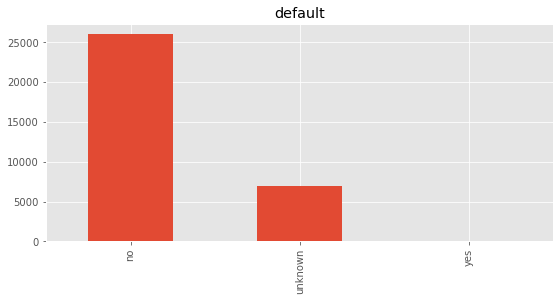

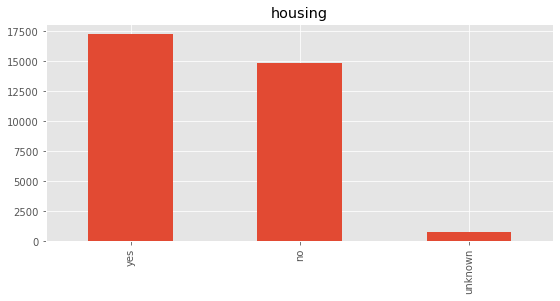

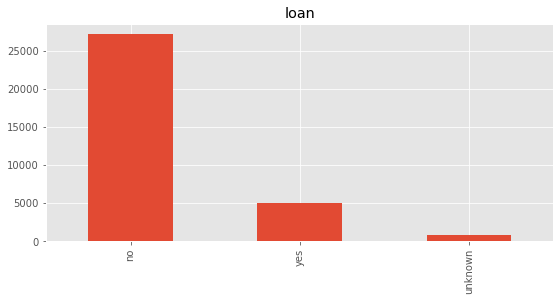

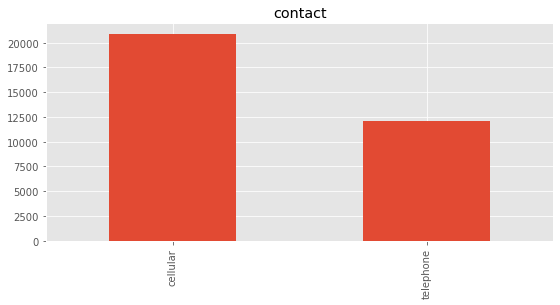

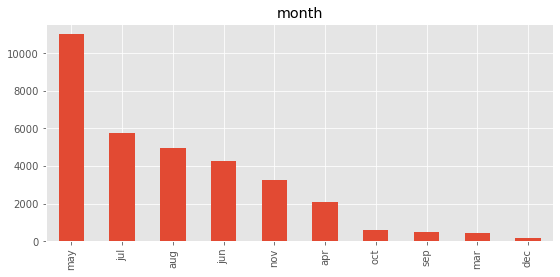

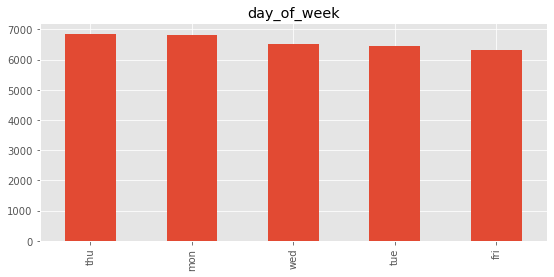

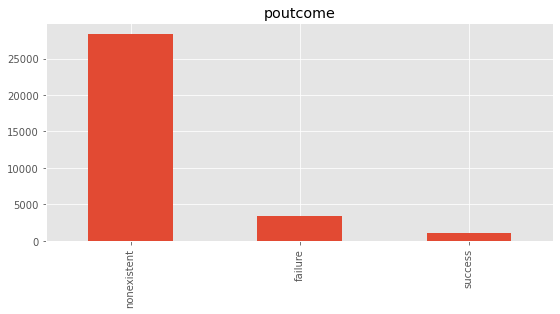

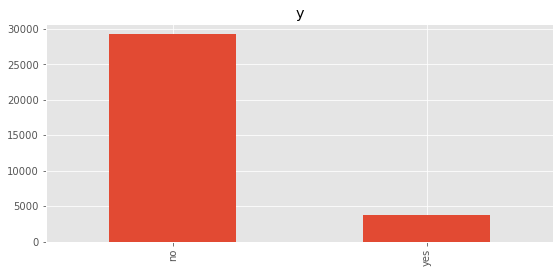

In [11]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

### Observations :

From the above visuals, we can make the following observations: 
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance in the target variable. 
- The missing values in some columns have been represented as `unknown`. `unknown` represents missing data. In the next task, we will treat these values.  

### Imputing `unknown` values of categorical columns 

In the previous task we have seen some categorical variables have a value called `unknown`. `unknown` values are a kind of missing data.
Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

- The code below imputes the value `unknown` in the categorical columns with the mode value of that column. You can modify this function to replace any unwanted value(for e.g `NaN` value) in a column with a value of your choice.

In [12]:
# Dataframe has no missing values, but still we will apply and see hoe the imputation works
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

### Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- The code below plots a histogram of all the continuous features and other that plots a boxplot of the same.

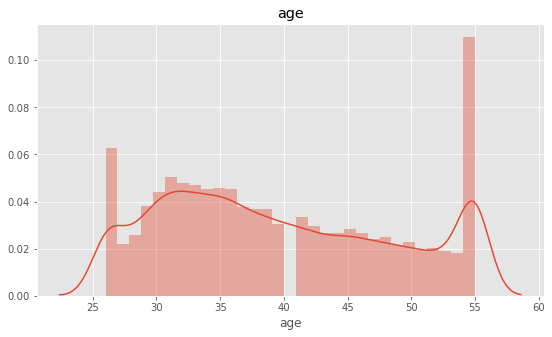

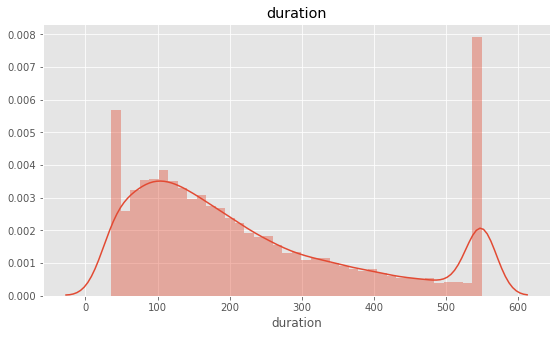

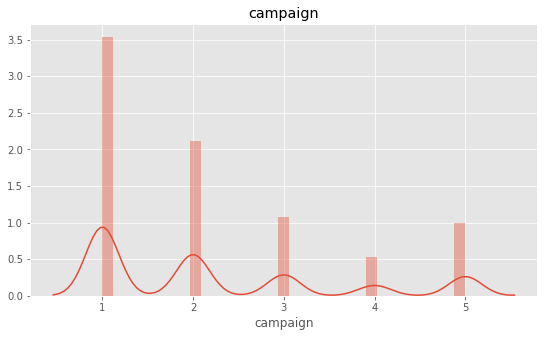

In [13]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

### Bivariate Analysis - Categorical Columns

Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart. 

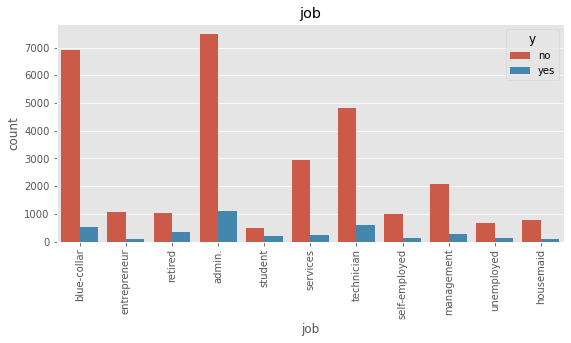

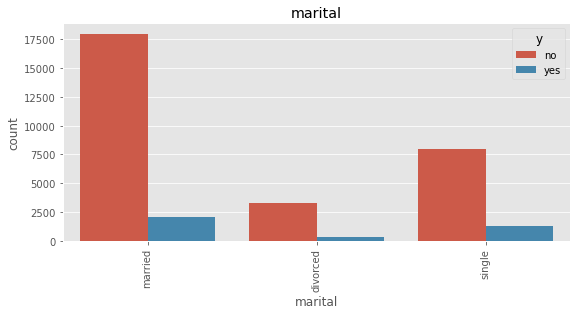

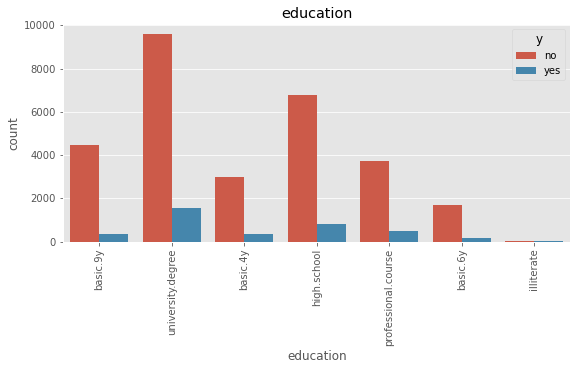

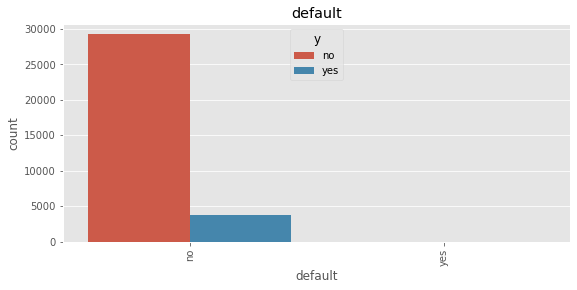

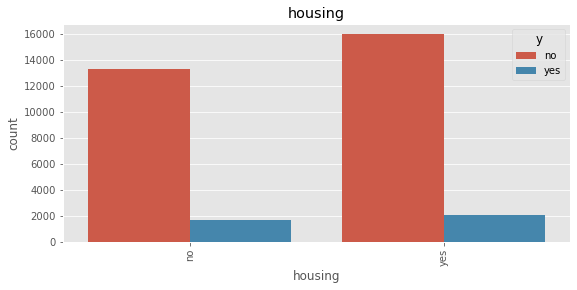

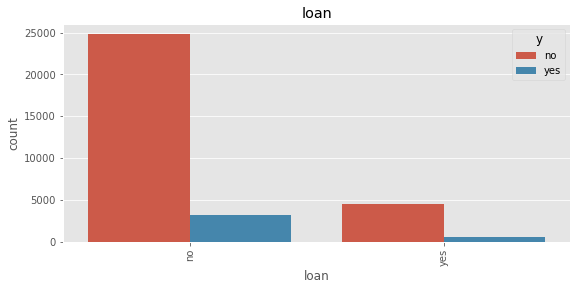

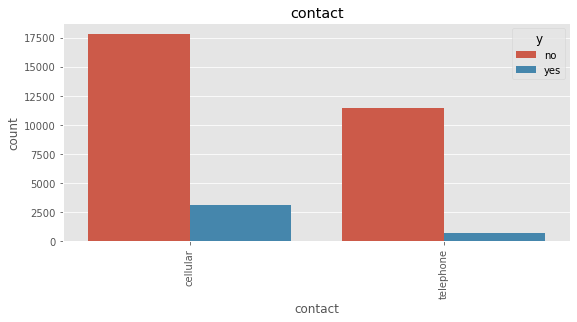

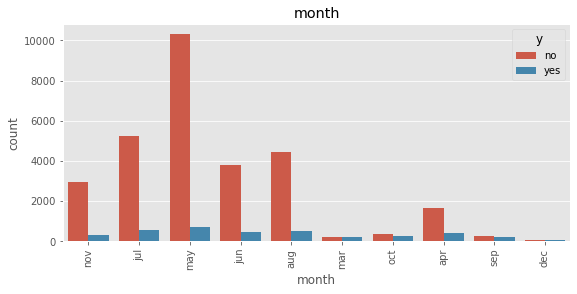

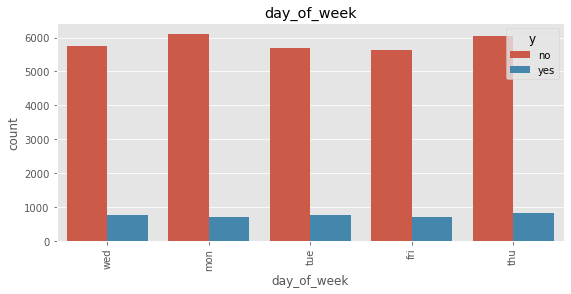

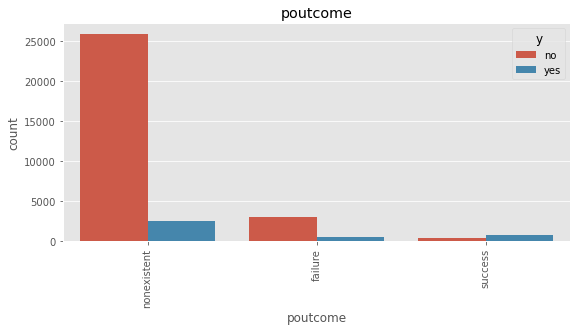

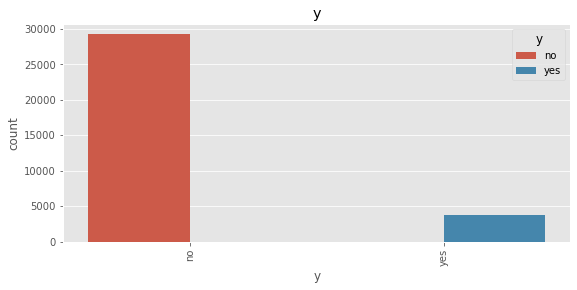

In [14]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a university degree
    - They do not hold a credit in default
    - Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
    - Cell-phones should be the preferred mode of contact for contacting customers.

### Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
- Label Encoding
- One-Hot Encoding.

For the given dataset, we are going to label encode the categorical columns. 

- In the code below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the  dataset. You can modify the below function in order to perform One-Hot Encoding as well.

In [15]:
# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)

In [16]:
dataframe.to_csv('preprocessed_data.csv',index=False)

In [17]:
# Run this is cell only when you are running this file on to your systems.
# intsall pandas profililing

from pandas_profiling import ProfileReport
prof = ProfileReport(dataframe)
prof

In [18]:
# accessing to the folder where the file is stored
path = '../input/bank-term-deposit-dataset/preprocessed_data.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (32954, 14)


age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   55    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   55    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       550         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

## Applying vanilla models on the data

Since we have performed preprocessing on our data and also done with the EDA part, it is now time to apply vanilla machine learning models on the data and check their performance.

### Fit vanilla classification models

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier

The code we have written below internally splits the data into training data and validation data. It then fits the classification model on the train data and then makes a prediction on the validation data and outputs the scores for this prediction.

#### PREPARING THE TRAIN AND TEST DATA


In [19]:
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)

#### FITTING THE MODEL AND PREDICTING THE VALUES

In [20]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)

#### GETTING THE METRICS TO CHECK OUR MODEL PERFORMANCE

ROC_AUC_SCORE is 0.5764533782516431


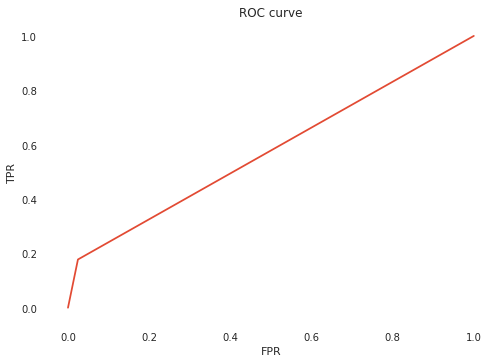

In [21]:
# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### The above two steps are combined and run in a single cell for all the remaining models respectively

ROC_AUC_SCORE is 0.6836050723527232


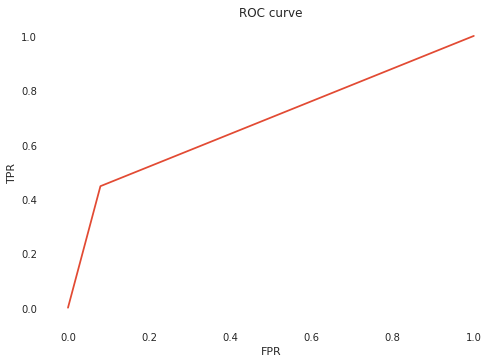

In [22]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6545573266250093


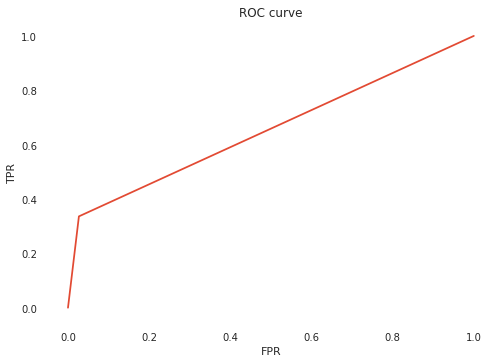

In [23]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [24]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall. 

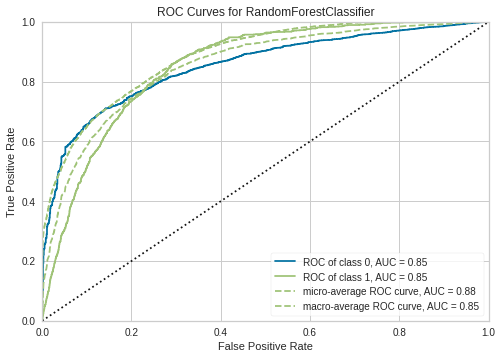

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    # Intializing the Random Forrest Classifier
    rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)
    # Fit the model on data
    rfc.fit(X_sm, y_sm)
    # Get the predictions on the validation data
    y_pred = rfc.predict(x_val)
    # Evaluation of result with the auc_roc graph
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)

## Prediction on the test data

In the below task, we have performed a prediction on the test data. We have used Random Forrest for this prediction. 

We have to perform the same preprocessing operations on the test data that we have performed on the train data. For demonstration purposes, we have preprocessed the test data and this preprocessed data is present in the csv file `new_test.csv`

We then make a prediction on the preprocessed test data using the random forrest model with the best parameter values we've got. And as the final step, we will read the `submission.csv`and concatenate this prediction with the `Id` column which is the unique client id and then convert this into a csv file which becomes the `final_submission.csv`

In [26]:
# Preprocessed Test File
test = pd.read_csv('../input/bank-term-deposit-dataset/new_test.csv')
test.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   32    4        0          6        0        0     0        0      3   
1   37   10        3          6        0        0     0        0      4   
2   55    5        0          5        1        2     0        0      3   
3   44    2        1          0        1        0     0        1      4   
4   28    0        2          3        0        0     0        0      5   

   day_of_week  duration  campaign  poutcome  
0            3       131         5         1  
1            3       100         1         1  
2            2       131         2         1  
3            3        48         2         1  
4            0       144         2         1

In [27]:
# Initialize Smote
smote = SMOTE()

# Applying SMOTE
X_sm, y_sm =  smote.fit_sample(x_train, y_train)

# Initialize our Random forrest model with the best parameter values derived
rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)

# Fitting the model
rfc.fit(X_sm,y_sm)

# Predict on the preprocessed test file
y_pred = rfc.predict(test)

# storing the predictions
prediction = pd.DataFrame(y_pred,columns=['y'])

# reading the submission file with client ids
submission = pd.read_csv('../input/bank-term-deposit-dataset/submission.csv')

# Concatenate predictions and create our final submission file
final_submission = pd.concat([submission['Id'],prediction['y']],1)

# Results
final_submission.head()

Id  y
0  14455.0  0
1  36380.0  0
2  40076.0  0
3  10778.0  0
4  27939.0  0